In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
categorical = df.select_dtypes(['category', 'object']).columns

for col in categorical:
    print('{} : {}'.format(col, ', '.join(df[col].unique())))

gender : female, male
race/ethnicity : group B, group C, group A, group D, group E
parental level of education : bachelor's degree, some college, master's degree, associate's degree, high school, some high school
lunch : standard, free/reduced
test preparation course : none, completed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
df_bachelor = df[df['parental level of education'] == "bachelor's degree"]
df_bachelor.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
27,female,group C,bachelor's degree,standard,none,67,69,75
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72
77,male,group A,bachelor's degree,standard,completed,80,78,81


In [9]:
df_master = df[df['parental level of education'] == "master's degree"]
df_master.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
25,male,group A,master's degree,free/reduced,none,73,74,72
29,female,group D,master's degree,standard,none,62,70,75


Compare math score between bachelor degree and master degree based on gender and race/ethnicity

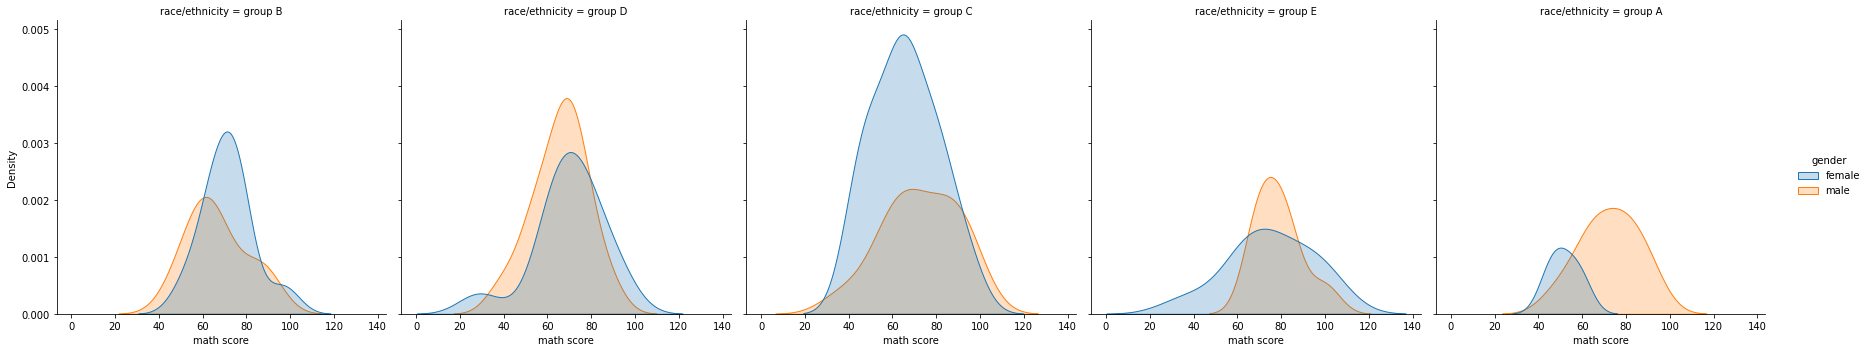

In [10]:
sns.displot(
    data=df_bachelor, 
    x='math score', 
    hue='gender', 
    kind='kde', 
    fill=True,
    col='race/ethnicity'
)

c:\users\wisnoe\anaconda3\envs\coba\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


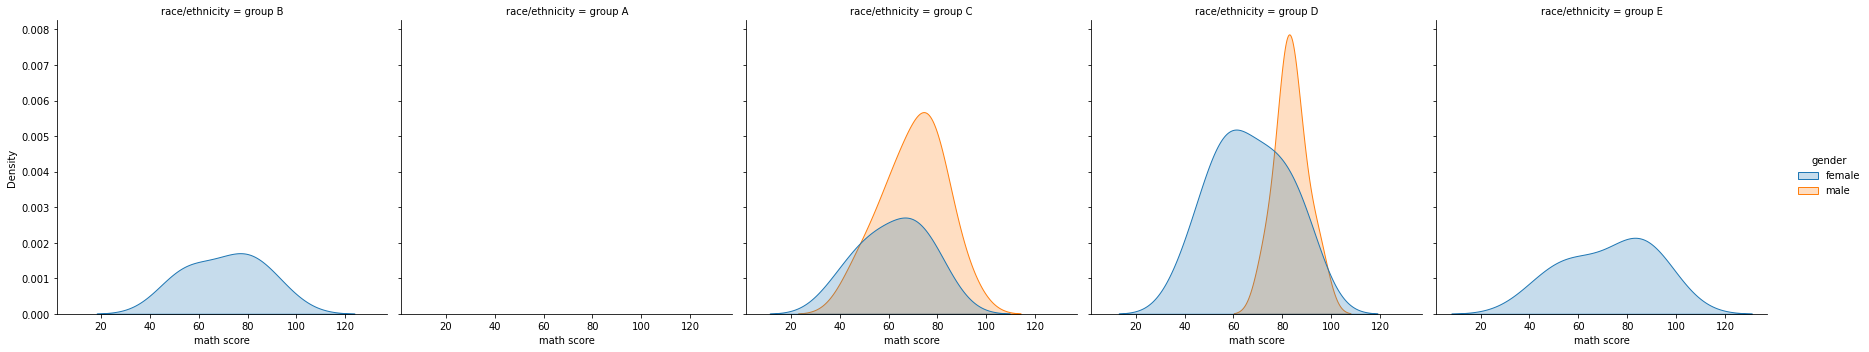

In [11]:
sns.displot(
    data=df_master, 
    x='math score', 
    hue='gender', 
    kind='kde', 
    fill=True,
    col='race/ethnicity'
)

Compare people good at exact sciences with those who good at humanitarian sciences

In [13]:
 # People with top 10% math score
topmath = df['math score'] > df['math score'].quantile(q=0.90)
topmath_mathmean = df[topmath]['math score'].mean()
topmath_writingmean = df[topmath]['writing score'].mean()
topmath_readingmean = df[topmath]['reading score'].mean()

# People with top 10% writing score
topwriting = df['writing score'] > df['writing score'].quantile(q=0.90)
topwriting_mathmean = df[topwriting]['math score'].mean()
topwriting_writingmean = df[topwriting]['writing score'].mean()
topwriting_readingmean = df[topwriting]['reading score'].mean()

# People with top 10% reading score
topreading = df['reading score'] > df['reading score'].quantile(q=0.90)
topreading_mathmean = df[topreading]['math score'].mean()
topreading_writingmean = df[topreading]['writing score'].mean()
topreading_readingmean = df[topreading]['reading score'].mean()

# Summary DataFrame
compare_df = pd.DataFrame({
    'Math': [topmath_mathmean, topmath_writingmean, topmath_readingmean],
    'Writing': [topwriting_mathmean, topwriting_writingmean, topwriting_readingmean],
    'Rading': [topreading_mathmean, topreading_writingmean, topreading_readingmean]
}, index=['Top 10% math score', 'Top 10% writing score', 'Top 10% reading score'])

compare_df.round()

,Math,Writing,Rading
Top 10% math score,92.0,86.0,86.0
Top 10% writing score,88.0,93.0,92.0
Top 10% reading score,89.0,92.0,93.0


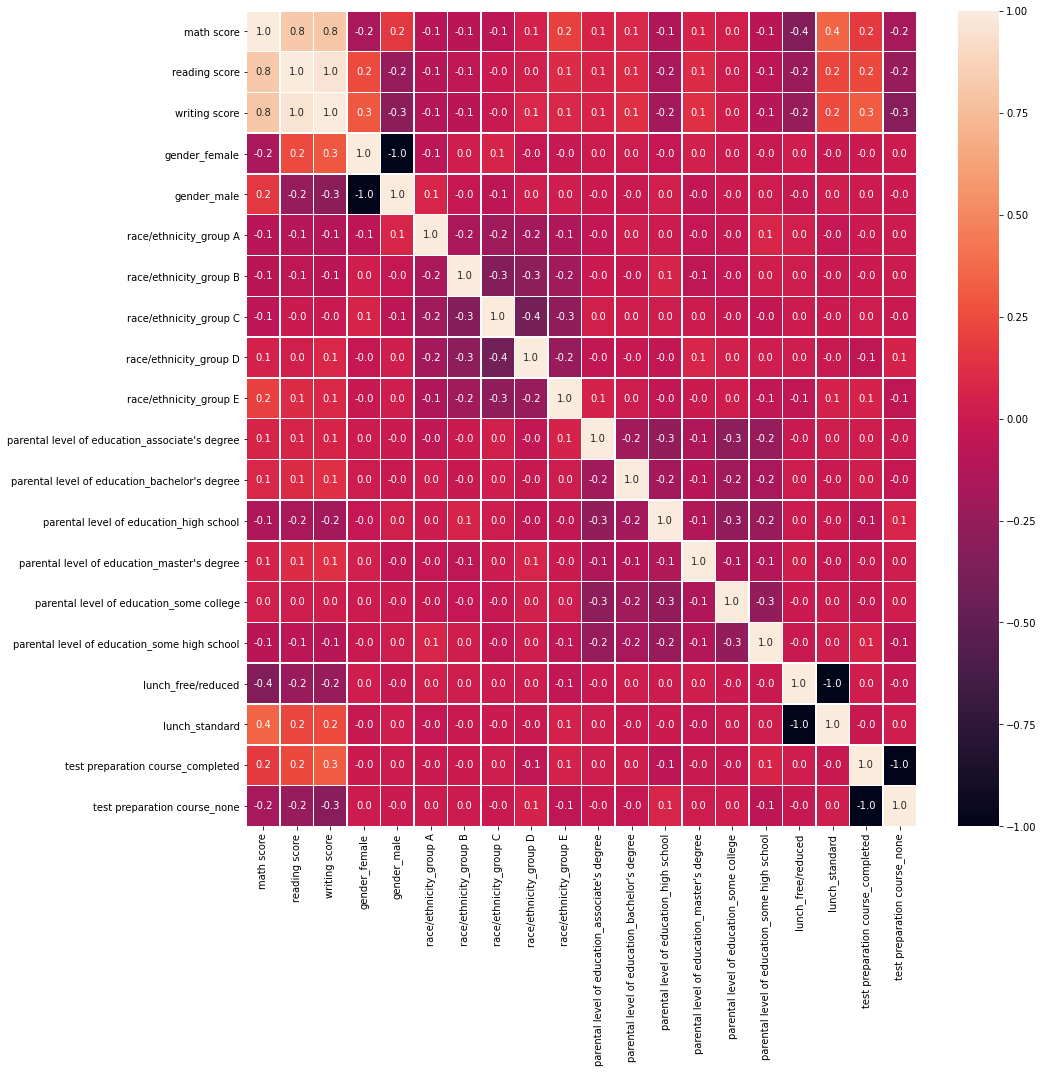

In [15]:
full_df = pd.get_dummies(df)
f,ax = plt.subplots(figsize=(15, 15))

sns.heatmap(full_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

there is small negative correlation between math, reading and writing score. This means that if person has not beed studied for the exam, then person has worse results and person studied for the exam have better result. 

person with standart lunch shows better results than the person with reduced free lunch

parental education does not rely much about test score result

females study better than males

good at reading makes you good at writing

people from different ethnicity group perfoms a little bit different.

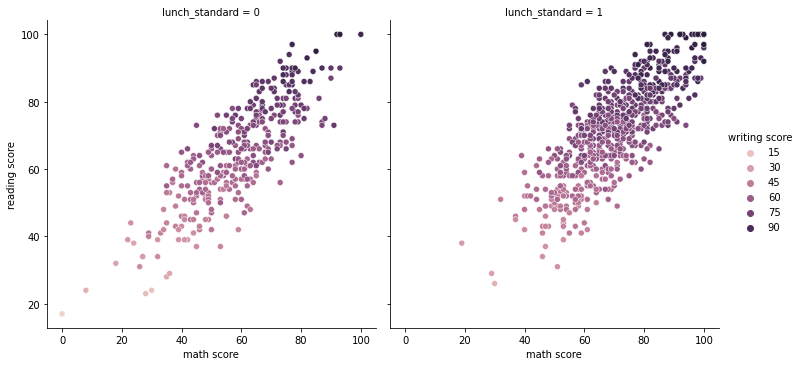

In [16]:
sns.relplot(
    data=full_df,
    x="math score", y="reading score", hue='writing score', col="lunch_standard");

In [18]:
df['final score'] = ((df['math score'] + df['writing score'] + df['reading score']) / 3).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [35]:
conditions = [
    (df['final score'] > 80),
    (df['final score'] > 72) & (df['final score'] <= 80),
    (df['final score'] > 65) & (df['final score'] <= 72),
    (df['final score'] > 59) & (df['final score'] <= 65),
    (df['final score'] > 54) & (df['final score'] <= 59),
    (df['final score'] > 39) & (df['final score'] <= 54),
    (df['final score'] < 39),
    ]

# create a list of the values we want to assign for each condition
values = ['A', 'AB', 'B', 'BC','C','D','E']

# create a new column and use np.select to assign values to it using our lists as arguments
df['grade'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score,final grade,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,,AB
1,female,group C,some college,standard,completed,69,90,88,82.0,,A
2,female,group B,master's degree,standard,none,90,95,93,93.0,,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,,D
4,male,group C,some college,standard,none,76,78,75,76.0,,AB
